In [1]:
import numpy as np
from itertools import combinations

In [2]:
from collections import deque
from matplotlib import pyplot as plt
import Field
import Game
import Agent
import Cards
from utils import * 
from importlib import reload
from random import choice, shuffle

reload(Field)
reload(Game)
reload(Agent)
reload(Cards)

<module 'Cards' from '/home/clark/Apps/durakula/game/Cards.py'>

In [3]:
numplayers = 4
durak_game = Game.DurakGame(numplayers, 'small')

In [20]:
for p in durak_game.players:
    print(p.player_mode)

MODE_ATTACK
MODE_ATTACK
MODE_ATTACK
MODE_DEFEND


In [21]:
print(durak_game.playing_field)

--- Playing Field ---
Drawing DurakDeck: --- Card Collection ---
Cards: C2,S4,H3,H1,D3,C3,D6,C6,D2,S3,D1,S1.
Size: 12
-----------------------

0:--- Card Collection ---
Cards: D4,C0,H4,H6,H7,H8.
Size: 6
-----------------------

1:--- Card Collection ---
Cards: D0,D8,C7,S2,S5,S6.
Size: 6
-----------------------

2:--- Card Collection ---
Cards: C1,C8,S0,S8.
Size: 4
-----------------------

3:--- Card Collection ---
Cards: C4,C5,H0,H2.
Size: 4
-----------------------

Trump suit is Spades
---------------------



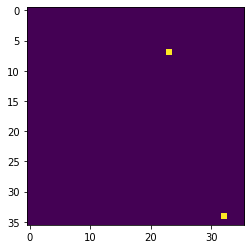

In [31]:
plt.imshow(durak_game.playing_field.field)

In [25]:
players_on_attack = [p.player_id for p in durak_game.playing_field.attack_players()]
p_att_idx = players_on_attack[0]
print(durak_game.players[p_att_idx].get_deck_from_hand())

--- Card Collection ---
Cards: D4,C0,H4,H6,H7,H8.
Size: 6
-----------------------



In [26]:
p_def_idx = durak_game.playing_field.defend_player().player_id
print(durak_game.players[p_def_idx].get_deck_from_hand())

--- Card Collection ---
Cards: C4,C5,H0,H2.
Size: 4
-----------------------



In [27]:
durak_game.playing_field.first_attack

False

In [28]:
attack_moves = durak_game.playing_field.get_legal_moves(p_att_idx)
attack_moves

[((2, 7),), ()]

In [29]:
random_move = choice(durak_game.playing_field.get_legal_moves(p_att_idx))
print(random_move)

()


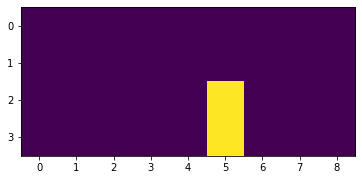

In [32]:
durak_game.playing_field.execute_move(random_move, p_att_idx)
plt.imshow(durak_game.playing_field.attacks)

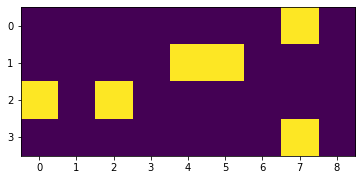

In [12]:
plt.imshow(durak_game.players[p_def_idx].hand)

In [13]:
# player = durak_game.players[p_def_idx]
# attack_idxs = np.flatnonzero(durak_game.playing_field.attacks)
# n_vals = durak_game.playing_field.n_vals
# n_suits = durak_game.playing_field.n_suits
# nontrump_attack_idxs = attack_idxs[attack_idxs >= n_vals]
# valid_defenses = np.zeros_like(durak_game.playing_field.field)
# f = lambda x : (x // n_vals + 1)*n_vals

# for att_idx in attack_idxs:
#     valid_defenses[att_idx + 1 : f(att_idx), att_idx] = 1
# for att_idx in nontrump_attack_idxs:
#     valid_defenses[:n_vals, att_idx] = 1

# if durak_game.playing_field.first_attack:
#     valid_defenses[att_idx % n_vals : att_idx % n_vals + n_suits*n_vals : n_vals, att_idx] = 1

# valid_defenses *= player.hand.ravel()[:,np.newaxis]
# plt.imshow(valid_defenses)

In [14]:
defend_actions = durak_game.playing_field.get_legal_moves(p_def_idx)
print(defend_actions)

['ACTION_GIVEUP', ((7, 23), (14, 32)), ((7, 23), (34, 32))]


In [15]:
random_defend = choice(defend_actions)
print(random_defend)
# random_defend = 'ACTION_GIVEUP'

((7, 23), (34, 32))


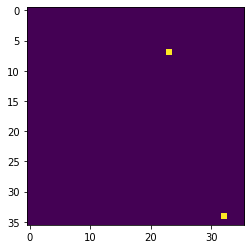

In [16]:
durak_game.get_next_state(random_defend, p_def_idx)
plt.imshow(durak_game.playing_field.field)

In [17]:
for p in durak_game.players:
    print(p.player_mode)

MODE_ATTACK
MODE_ATTACK
MODE_ATTACK
MODE_DEFEND


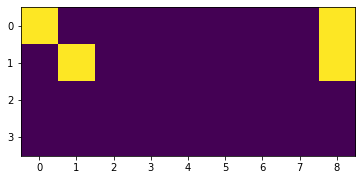

In [18]:
plt.imshow(durak_game.players[p_att_idx].hand)

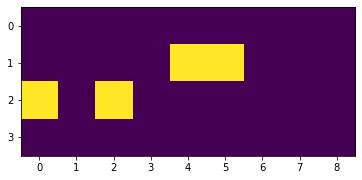

In [19]:
plt.imshow(durak_game.players[p_def_idx].hand)

In [22]:
durak_game.playing_field.field_active

True